In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the data


In [3]:
data = pd.read_csv('insurance.csv')

# Examine the distribution of BMI

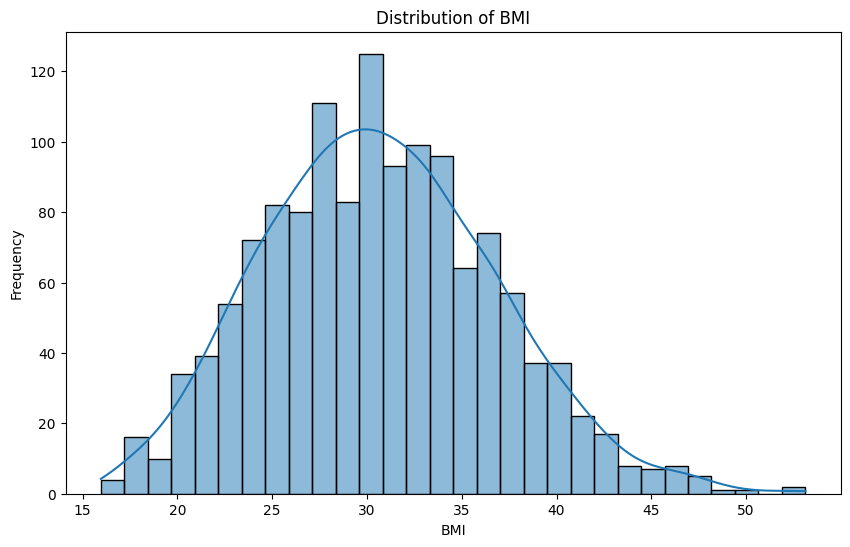

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Examine the relationship between "smoker" and "charges"

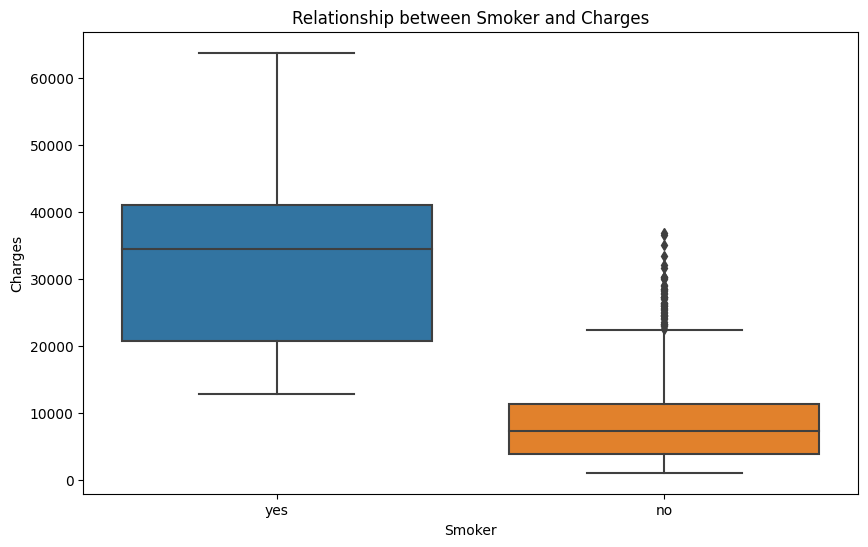

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Relationship between Smoker and Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Examine the relationship between "smoker" and "region"

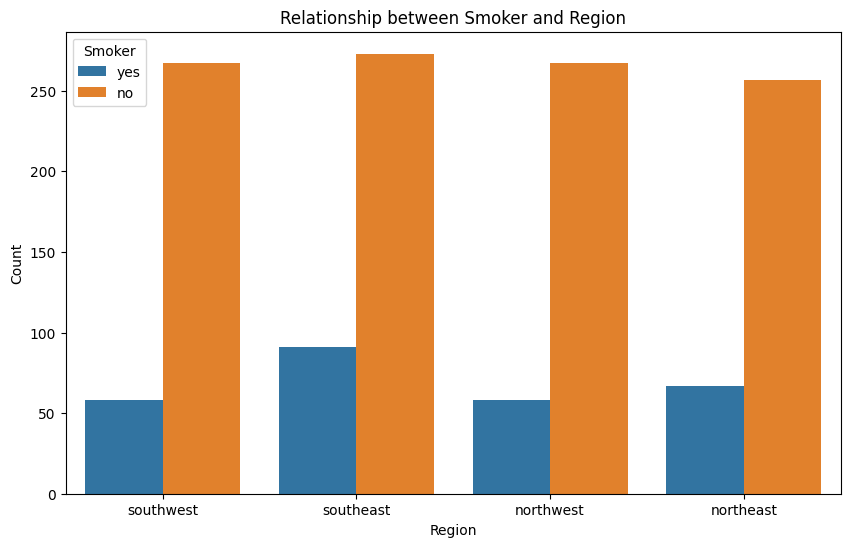

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=data)
plt.title('Relationship between Smoker and Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

# Examine the relationship between "bmi" and "sex"

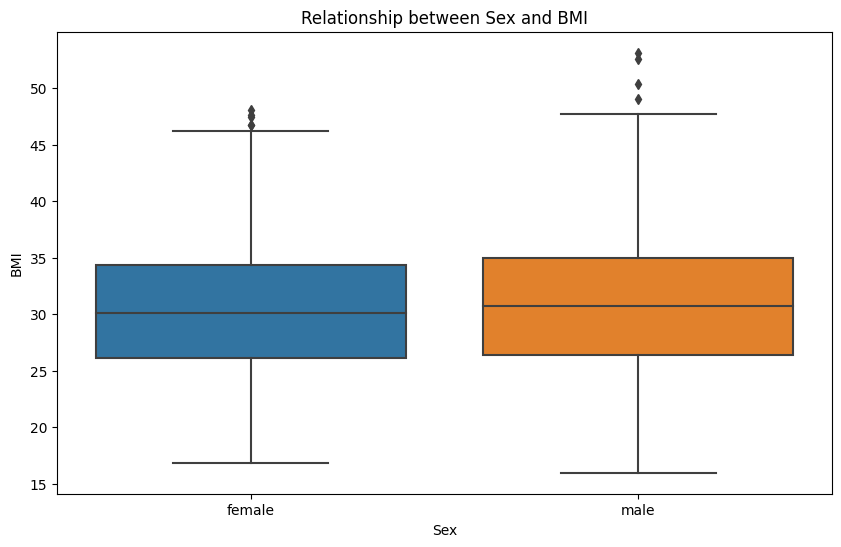

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=data)
plt.title('Relationship between Sex and BMI')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

# Find the "region" with the most "children"

In [8]:
region_children = data.groupby('region')['children'].sum().idxmax()
print("Region with the most children:", region_children)

Region with the most children: southeast


# Examine the relationship between "age" and "bmi"

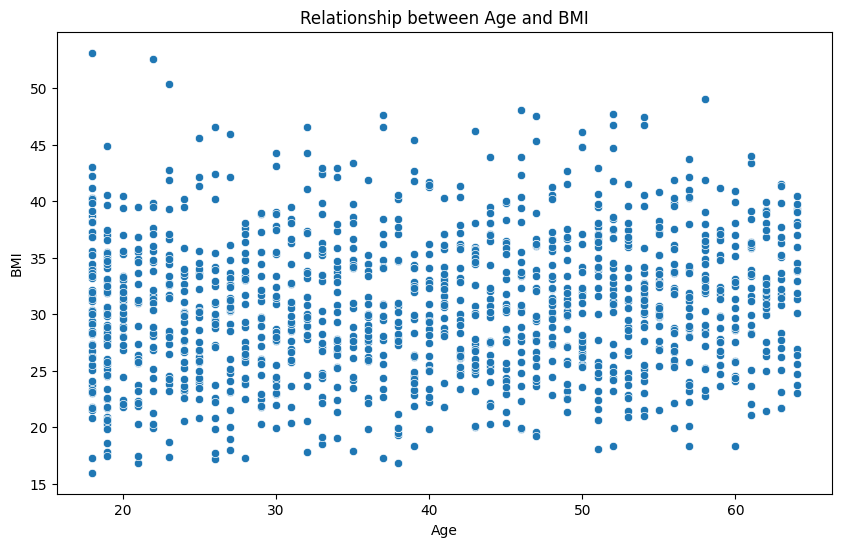

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=data)
plt.title('Relationship between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Examine the relationship between "bmi" and "children"

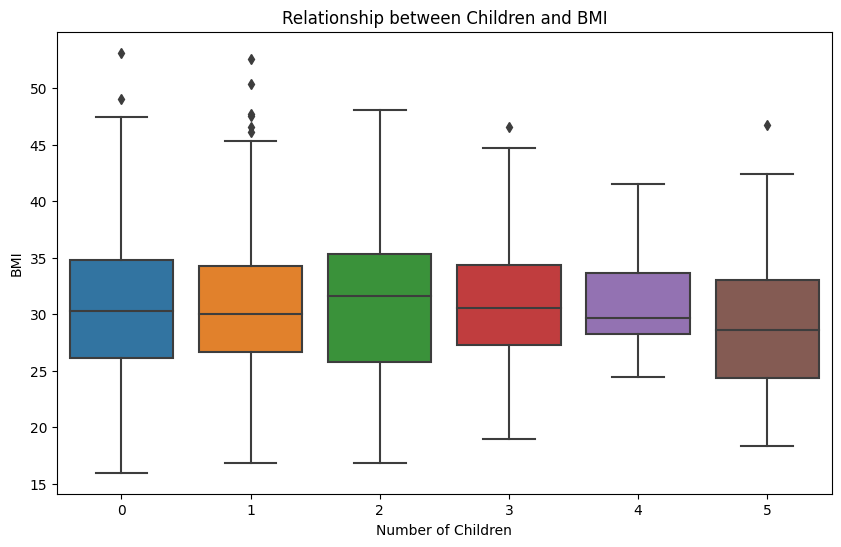

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='bmi', data=data)
plt.title('Relationship between Children and BMI')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.show()

# Check for outliers in the "bmi" variable using a box plot

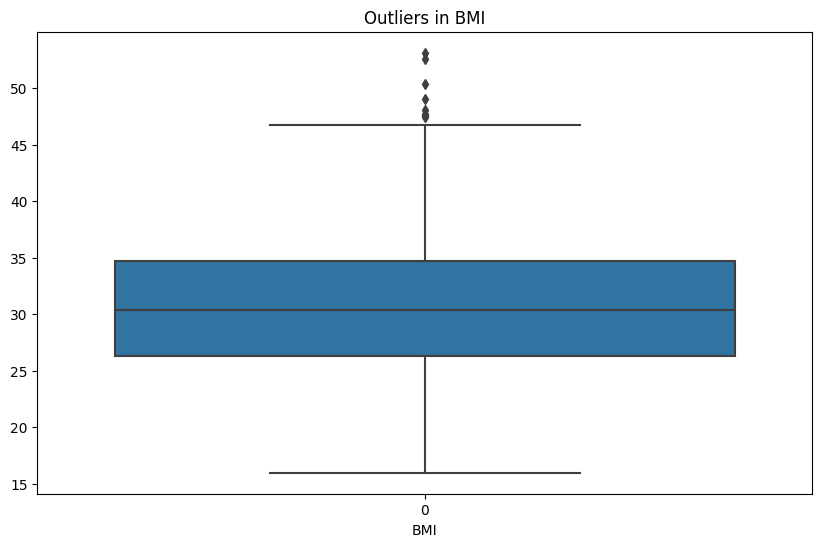

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['bmi'])
plt.title('Outliers in BMI')
plt.xlabel('BMI')
plt.show()

# Examine the relationship between "bmi" and "charges"

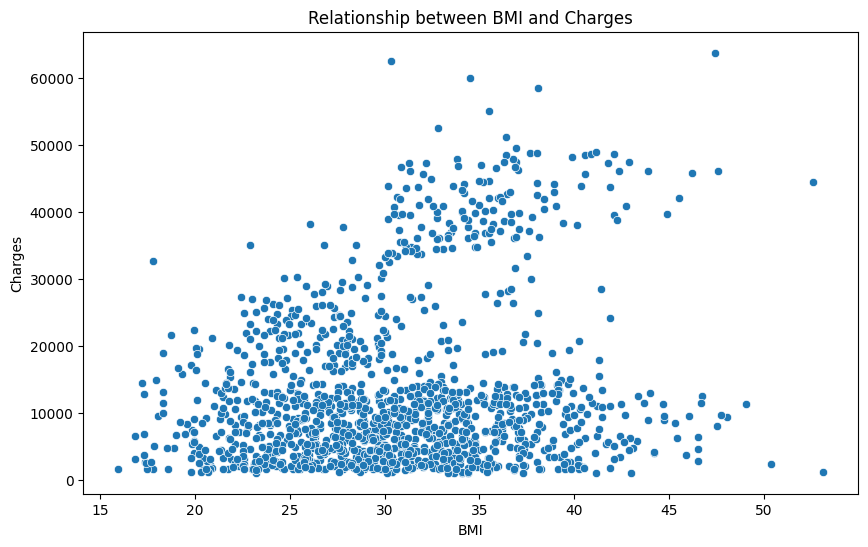

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Examine the relationship between "region", "smoker", and "bmi" using a bar plot

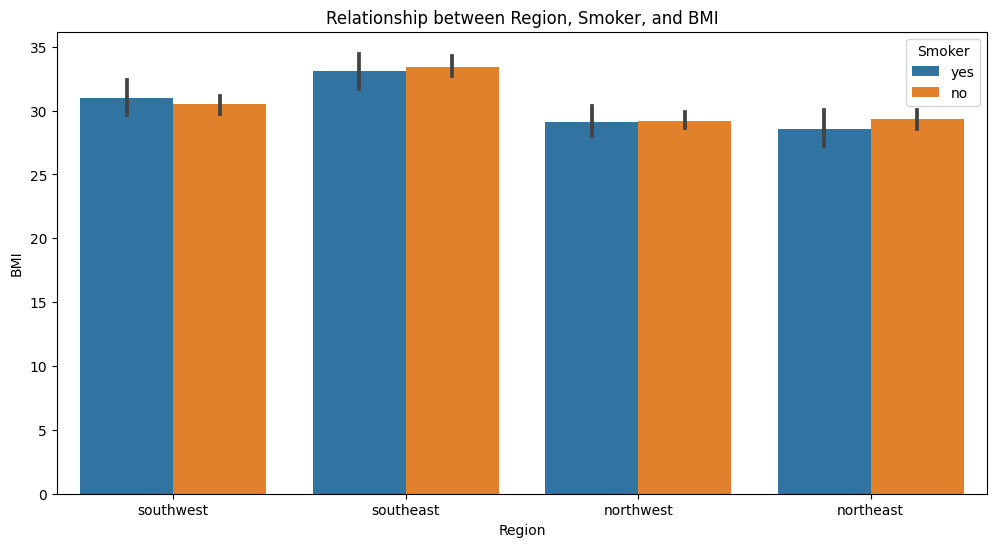

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='bmi', hue='smoker', data=data)
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.legend(title='Smoker')
plt.show()

# Perform label encoding for 'sex', 'smoker', and 'region' columns

In [15]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])


# Perform one-hot encoding for 'region' column

In [17]:
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_regions = onehot_encoder.fit_transform(data[['region']])
encoded_regions_df = pd.DataFrame(encoded_regions, columns=[f'region_{i}' for i in range(encoded_regions.shape[1])])
data_encoded = pd.concat([data, encoded_regions_df], axis=1)

# Splitting the dataset into features (X) and target (y)

In [18]:
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Splitting the dataset into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset using Standard Scaling

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a list of regression models

In [24]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Perform cross-validation for each model

In [25]:
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores) ** 0.5
    mean_rmse = rmse_scores.mean()
    print(f"{model.__class__.__name__} - Mean RMSE: {mean_rmse:.2f}")

LinearRegression - Mean RMSE: 6165.25
Ridge - Mean RMSE: 6147.02
Lasso - Mean RMSE: 6146.92
DecisionTreeRegressor - Mean RMSE: 6553.07
RandomForestRegressor - Mean RMSE: 4919.08


# Choose the best performing model based on cross-validation results

In [26]:
best_model = RandomForestRegressor()  # Replace with the best model based on results
best_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

# Define hyperparameters to search for each model

In [27]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV instance for the best model

In [28]:
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the scaled training data

In [29]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

# Get the best hyperparameters and model

In [31]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


# Evaluate the best model on the test set

In [32]:
test_rmse = mean_squared_error(y_test, best_model.predict(X_test_scaled), squared=False)
print("Test RMSE of Best Model:", test_rmse)

Test RMSE of Best Model: 4358.306731204993


# Predict using the optimized model

In [33]:
y_pred = best_model.predict(X_test_scaled)

# Calculate regression evaluation metrics

In [34]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics

In [35]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 18994837.563266754
Root Mean Squared Error: 4358.306731204993
Mean Absolute Error: 2439.300288398062
R-squared: 0.8776489998936109
